<a href="https://colab.research.google.com/github/AlexanderSutherland/CS7643_Project/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Stock Price Prediction Project

**Add Necessary Imports**

In [1]:
'''
Add Necessary Imports:
'''
# Pytorch (Deep Learning Model Libraries)
import torch
import torch.nn as nn
import torch.optim as optim

# Datetime class used for indexing dates
import datetime as dt


# Local Libraries
from plotter import plot_price_predictions, plot_daily_change_predictions
from train_model import train_model, test_model
from lstm import LSTM
from data_util import DataUtil

**Set Device (CUDA or CPU)**

In [2]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cuda


Common Initial Settings:

In [3]:
# Common Initial Settings like date and look back
start_date=dt.datetime(2014, 1, 1)
end_date=dt.datetime(2016, 7, 30)
look_back=3

# Data Split
split_ratio = 0.8

**Predict Price based on SMH ETF Closing Price**

Epoch 1/200, Loss: 0.14029233069980845
Test Loss: 0.4474137369543314
Epoch 2/200, Loss: 0.14094444977886536
Test Loss: 0.40294156819581983
Epoch 3/200, Loss: 0.13462314798551447
Test Loss: 0.41956323869526385
Epoch 4/200, Loss: 0.13561654310016072
Test Loss: 0.4193903259932995
Epoch 5/200, Loss: 0.1352062093860963
Test Loss: 0.39025519490242006
Epoch 6/200, Loss: 0.14067518754917033
Test Loss: 0.4084024213254452
Epoch 7/200, Loss: 0.14191540725090923
Test Loss: 0.41500663869082927
Epoch 8/200, Loss: 0.13139809120227308
Test Loss: 0.3962173663079739
Epoch 9/200, Loss: 0.1391414083978709
Test Loss: 0.4169510632753372
Epoch 10/200, Loss: 0.13421987106694894
Test Loss: 0.40431414917111397
Epoch 11/200, Loss: 0.13923643660895965
Test Loss: 0.3964103415608406
Epoch 12/200, Loss: 0.13841943442821503
Test Loss: 0.40622159764170646
Epoch 13/200, Loss: 0.14382279138354695
Test Loss: 0.3913772083818913
Epoch 14/200, Loss: 0.13171865308985992
Test Loss: 0.4062564574182034
Epoch 15/200, Loss: 0.133

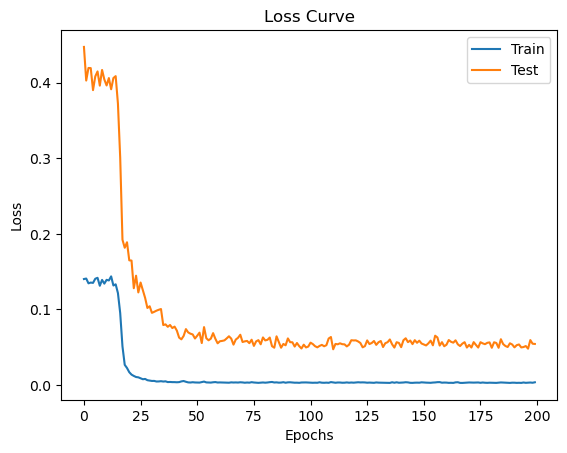

Test Loss: 0.05441896391566843


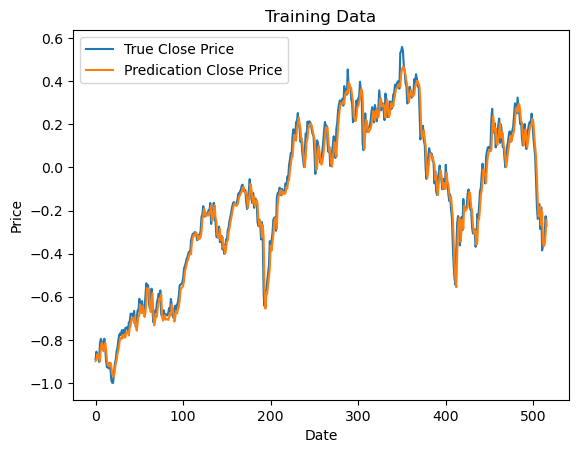

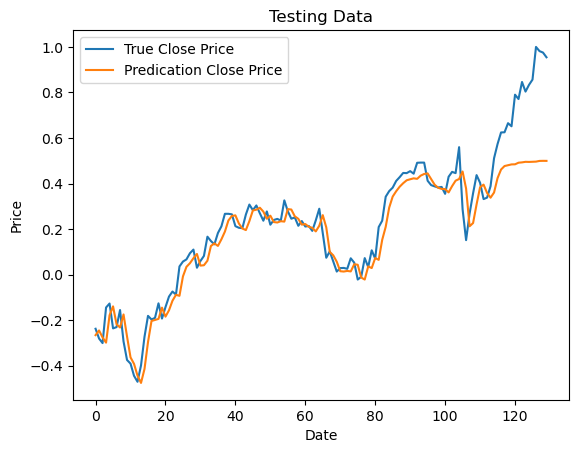

In [4]:

def main_close_price(device='cpu', 
                     start_date=dt.datetime(2014, 1, 1), 
                     end_date=dt.datetime(2015, 12, 31), 
                     look_back=7,
                     num_layers = 4,
                     split_ratio = 0.8):
    """
    Main function to train and test a model for predicting close prices.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.001
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_close_price(batch_size=batch_size,
                                                                split_ratio=split_ratio,
                                                                look_back=look_back,
                                                                device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
    # Create LSTM model
    model = LSTM(1, look_back, num_layers = num_layers).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_price_predictions(pred_train,y_train,pred_test,y_test)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_closing_price.pth')
    

main_close_price(device=device, 
                 start_date=start_date, 
                 end_date=end_date, 
                 look_back=look_back,
                 split_ratio=split_ratio)

**Predict Price based on SMH ETF Daily Return**

Epoch 1/200, Loss: 2.101919558313158
Test Loss: 1.4786384652058284
Epoch 2/200, Loss: 1.518583733174536
Test Loss: 1.4790579229593277
Epoch 3/200, Loss: 1.537231683731079
Test Loss: 1.4782984405755997
Epoch 4/200, Loss: 1.5982947614457872
Test Loss: 1.4774188448985417
Epoch 5/200, Loss: 1.5568774276309543
Test Loss: 1.4766533474127452
Epoch 6/200, Loss: 1.7878023783365886
Test Loss: 1.4754661719004314
Epoch 7/200, Loss: 1.5960432026121352
Test Loss: 1.4743308077255886
Epoch 8/200, Loss: 1.4921097771988974
Test Loss: 1.4735097984472911
Epoch 9/200, Loss: 1.65634908941057
Test Loss: 1.4731993675231934
Epoch 10/200, Loss: 2.226058761278788
Test Loss: 1.4730021208524704
Epoch 11/200, Loss: 1.6569207906723022
Test Loss: 1.4729679226875305
Epoch 12/200, Loss: 1.550580170419481
Test Loss: 1.47297236820062
Epoch 13/200, Loss: 1.6047944360309176
Test Loss: 1.472966065009435
Epoch 14/200, Loss: 1.6400902138815985
Test Loss: 1.4729877710342407
Epoch 15/200, Loss: 1.6787664492925007
Test Loss: 1.4

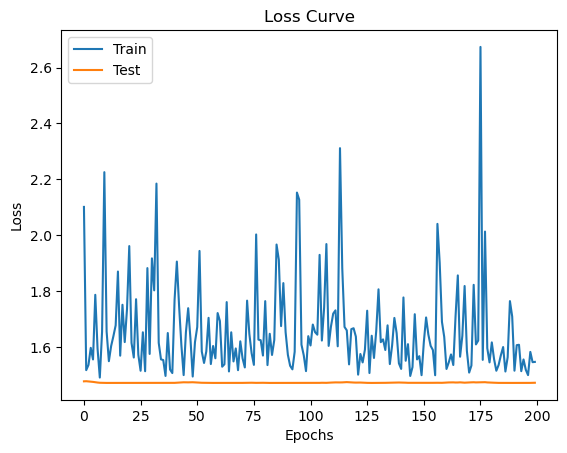

Test Loss: 1.47353799144427


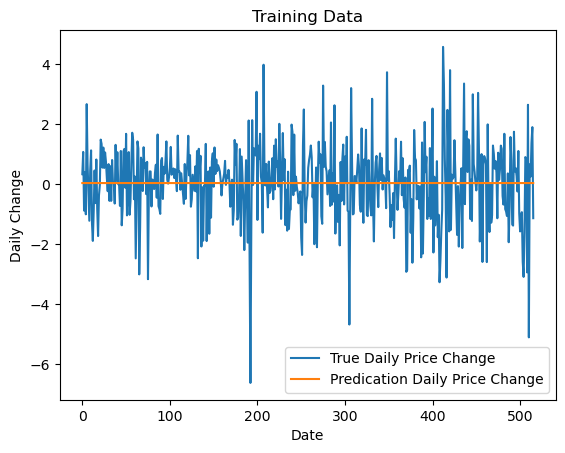

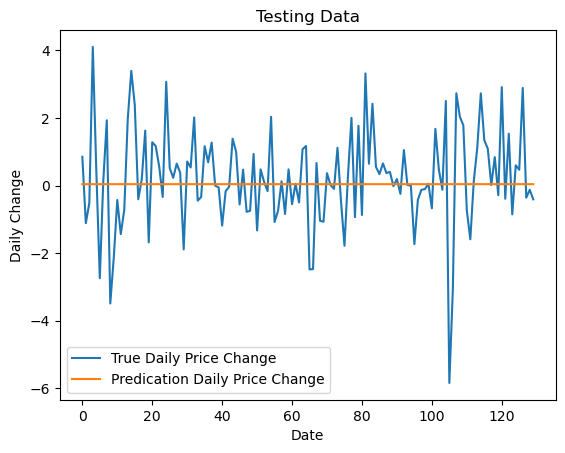

In [5]:

def main_daily_return(device = 'cpu', 
                     start_date = dt.datetime(2014, 1, 1), 
                     end_date = dt.datetime(2015, 12, 31), 
                     look_back = 7,
                     num_layers = 4,
                     split_ratio = 0.8,
                     batch = True):
    """
    Main function to train and test a model for predicting daily return.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 64
    learning_rate = 0.0001
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_daily_returns(batch_size=batch_size,
                                                            split_ratio=split_ratio,
                                                            look_back=look_back,
                                                            device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
    if not batch:
        train_loader = (x_train.squeeze(-1).to(device), y_train.squeeze(-1).to(device))
        test_loader = (x_test.squeeze(-1).to(device), y_test.squeeze(-1).to(device))
    
    # Create LSTM model
    if batch:
        model = LSTM(1, 
                    look_back, 
                    num_layers,
                    batch_first=batch).to(device)
    else:
        model = LSTM(x_train.shape[1], 
                    look_back, 
                    num_layers,
                    batch_first=batch).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device,
                        batch=batch)
    
    # Test model
    test_model(test_loader, model, criterion, device, batch=batch) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    if batch:
        pred_train = model(x_train).detach().numpy()
        pred_test = model(x_test).detach().numpy()
    else:
        pred_train = model(x_train.squeeze(-1)).detach().numpy()
        pred_test = model(x_test.squeeze(-1)).detach().numpy()
    plot_daily_change_predictions(pred_train,y_train,pred_test,y_test, save=False)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_daily_returns.pth')
    

main_daily_return(device=device, 
                  start_date=start_date, 
                  end_date=end_date, 
                  look_back=look_back, 
                  split_ratio=split_ratio,
                  batch=True)

**Predict Price based on SMH ETF Daily Return with multiple features**

In [6]:

def main_daily_multi_data_return(device = 'cpu', 
                                start_date = dt.datetime(2014, 1, 1), 
                                end_date = dt.datetime(2015, 12, 31), 
                                look_back = 7,
                                num_layers = 4,
                                split_ratio = 0.8):
    """
    Main function to train and test a model for predicting daily return.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 64
    learning_rate = 0.0001
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_daily_returns_all_features(batch_size=batch_size,
                                                                        split_ratio=split_ratio,
                                                                        look_back=look_back,
                                                                        device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
    # Create LSTM model
    model = LSTM(x_train.shape[2], 
                 look_back, 
                 num_layers).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_daily_change_predictions(pred_train,y_train,pred_test,y_test, save=False)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_daily_returns_all_features.pth')
    

main_daily_multi_data_return(device=device, 
                             start_date=start_date, 
                             end_date=end_date, 
                             look_back=look_back,
                             split_ratio = split_ratio)

RuntimeError: input.size(-1) must be equal to input_size. Expected 1, got 21